# Imports

In [7]:
%reload_ext autoreload
%autoreload 2
import iris_utilities as iris

: 

# Main

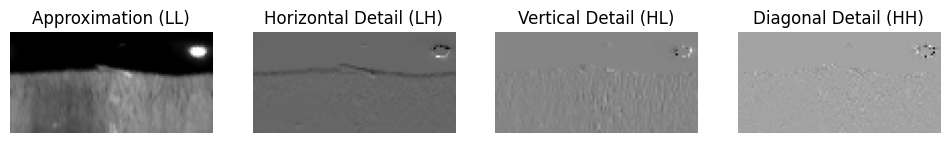

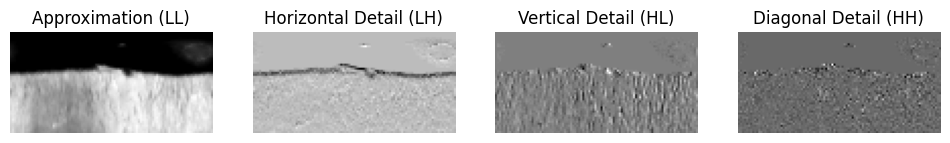

DWT Features: [142.8739, 116.8735690769731, 510.00000000000006, 0.0, 181.00000000000003, -1.0781, 8.421980194111123, 195.00000000000003, -129.5, 0.0, 0.11709999999999982, 7.677690902217933, 162.0, -175.50000000000006, 0.0, -0.07690000000000002, 3.6653971667474186, 53.00000000000001, -93.5, 0.0]
DWT Features N: [137.5854, 112.25012742460474, 298.00000000000006, 0.0, 179.00000000000003, -1.0806, 5.615487836332656, 19.000000000000004, -53.00000000000001, 0.0, -0.016200000000000173, 5.526910308662519, 39.50000000000001, -39.0, 0.0, -0.005400000000000023, 2.1646641402305353, 23.000000000000007, -16.000000000000004, 0.0]
Training set size: 1
Testing set size: 1


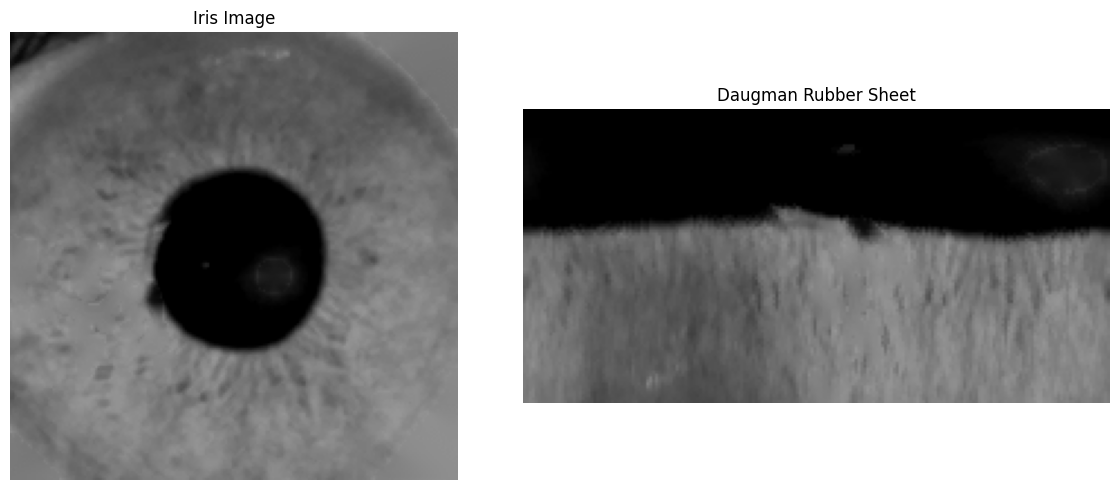

In [6]:
# Load the image
imagepath = "Dataset/VISA_Iris/VISA_Iris/S0001_F_30/R/1.bmp"
image1, radius, success = iris.processing(imagepath, 60)

# Remove reflection
imageN = iris.remove_reflection(image1)

# Daugman
sheet = iris.generate_rubber_sheet_model(image1)
sheetN = iris.generate_rubber_sheet_model(imageN)

# DWT reflection
dwt_feature = iris.feature_extraction(sheet)

# DWT no reflection
dwt_featureN = iris.feature_extraction(sheetN)

print("DWT Features:", dwt_feature)
print("DWT Features N:", dwt_featureN)

# Split the data
# Assuming you want to use DWT features for classification
features = [dwt_feature, dwt_featureN]
labels = ['reflection', 'no_reflection']  # Example labels
X_train, X_test, y_train, y_test = iris.split_data(features, labels)

# Display the images
fig, axes = iris.plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(imageN)
axes[0].set_title('Iris Image')
axes[0].axis('off')

axes[1].imshow(sheetN)
axes[1].set_title('Daugman Rubber Sheet')
axes[1].axis('off')

iris.plt.tight_layout()
iris.plt.show()